**Titanic Survival Detection**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Getting description of train and test data files.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.shape

(891, 12)

In [ ]:
train.info()
train.describe()
train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.shape

(418, 12)

In [ ]:
test.info()
test.describe()
test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 12)


In [ ]:
train.columns
test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data = test.drop(columns='Cabin')
data = test.drop(columns='Parch')
data = test.drop(columns='Ticket')
data = test.drop(columns='Pclass')
data = test.drop(columns='SibSp')

In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)
data['Fare'].fillna(data['Fare'].mode()[0],inplace=True)

In [ ]:
#Count of people survived and not survived in titanic.
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
#Survival data values based on the sex.
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

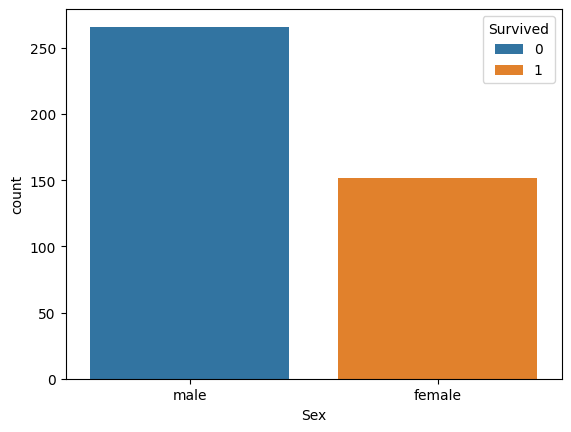

In [ ]:
# Graphical representation of Survied based on Gender
sns.countplot(x='Sex', hue='Survived', data=data)

<Axes: xlabel='Embarked', ylabel='count'>

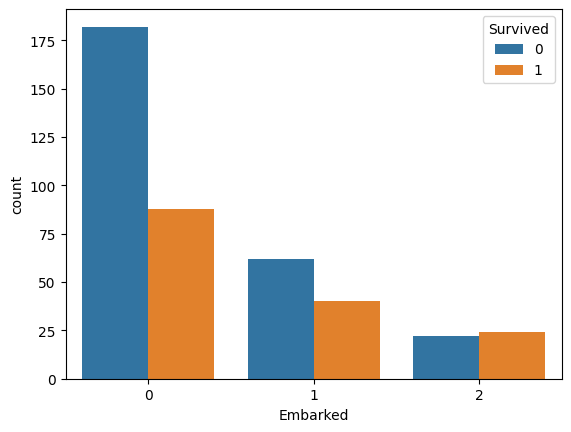

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

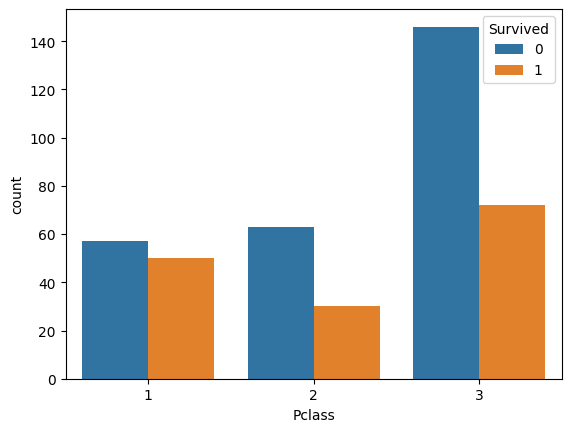

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data)

In [ ]:
x=data.drop(columns=['PassengerId','Name','Ticket','Sex','Pclass','Cabin','Embarked','Parch'],axis=1)
y=data['Survived']

In [ ]:
print(x)
print(y)

     Survived       Age      Fare
0           0  34.50000    7.8292
1           1  47.00000    7.0000
2           0  62.00000    9.6875
3           0  27.00000    8.6625
4           1  22.00000   12.2875
..        ...       ...       ...
413         0  30.27259    8.0500
414         1  39.00000  108.9000
415         0  38.50000    7.2500
416         0  30.27259    8.0500
417         0  30.27259   22.3583

[418 rows x 3 columns]
0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [ ]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [ ]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.50000,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.00000,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.00000,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.00000,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,30.27259,0,A.5. 3236,8.0500,NaN,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.00000,0,PC 17758,108.9000,C105,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.50000,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,0,3,"Ware, Mr. Frederick",0,30.27259,0,359309,8.0500,NaN,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(334, 3) (84, 3) (334,) (84,)


In [ ]:
x_train

,Survived,Age,Fare
280,1,23.00000,8.6625
284,1,2.00000,20.2125
40,0,39.00000,13.4167
17,0,21.00000,7.2250
362,1,31.00000,21.0000
...,...,...,...
299,0,29.00000,7.8542
22,1,30.27259,31.6833
72,1,29.00000,7.9250
15,1,24.00000,27.7208


In [ ]:
x_test

,Survived,Age,Fare
146,0,30.27259,51.8625
223,0,21.00000,7.7958
193,0,61.00000,12.3500
305,1,64.00000,26.5500
188,1,30.27259,69.5500
...,...,...,...
348,0,24.00000,13.5000
30,0,50.00000,26.0000
174,0,40.00000,31.3875
68,0,31.00000,28.5375


In [ ]:
y_train

280    1
284    1
40     0
17     0
362    1
      ..
299    0
22     1
72     1
15     1
168    1
Name: Survived, Length: 334, dtype: int64

In [ ]:
y_test

146    0
223    0
193    0
305    1
188    1
      ..
348    0
30     0
174    0
68     0
204    0
Name: Survived, Length: 84, dtype: int64

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_train_prediction=model.predict(x_train)

In [ ]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
train_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  1.0


In [ ]:
x_test_prediction=model.predict(x_test)
print(x_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 1.0
